### Download all stocks data from a given index for 5 years

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from plotly.subplots import make_subplots

### Constants

In [45]:
S_DATE = "2016-12-12"
E_DATE = "2021-12-10"
S_DATE_DT = pd.to_datetime(S_DATE)
E_DATE_DT = pd.to_datetime(E_DATE)

### Holds stocks not downloaded

In [46]:
stocks_not_downloaded = []
missing_stocks = []

### Function that returns a stock dataframe from a CSV

In [47]:
def get_stock_df_from_csv(ticker):
    try:
        df = pd.read_csv("/home/johnadi/Desktop/projects/projects-from-yt-channel-derek-banas/python-for-finance/Stock List/" + ticker + ".csv", index_col=0)
    except FileNotFoundError:
        print("File Does not Exist")
    else:
        return df

### Returns a Named Columns Data from a CSV file

In [48]:
def get_column_from_csv(file, col_name):
    try:
        df = pd.read_csv(file)
    except FileNotFoundError:
        print("File Does not Exist")
    else:
        return df[col_name]

### Get Stock Tickers

In [49]:
tickers = get_column_from_csv("/home/johnadi/Desktop/projects/projects-from-yt-channel-derek-banas/python-for-finance/sp500_companies.csv", "Symbol")
tickers

0       MSFT
1       AAPL
2       NVDA
3      GOOGL
4       GOOG
       ...  
498       GL
499      FMC
500      MHK
501      CMA
502      IVZ
Name: Symbol, Length: 503, dtype: object

### Function that saves stock data to csv

In [50]:
def save_to_csv_from_yahoo(folder, ticker):
    stock = yf.Ticker(ticker)
    try:
        print("Get Data for: ", ticker)
        df = stock.history(period="5y")
        time.sleep(2)
        if df.empty:
            stocks_not_downloaded.append(ticker)
        the_file = folder + ticker.replace("-", "") + ".csv"
        print(the_file + " Saved")
        df.to_csv(the_file)
    except Exception as ex:
        stocks_not_downloaded.append(ticker)
        print("Could not get data for ", ticker)

### Get 5 years data for the 1st 20 stocks

In [51]:
folder = "/home/johnadi/Desktop/projects/projects-from-yt-channel-derek-banas/stock-technical-analysis/stocks-files/"

In [52]:
# for x in range(20):
#     save_to_csv_from_yahoo(folder, tickers[x])
# print("Finished")

### Stocks Not Downloaded

In [53]:
stocks_not_downloaded

[]

### Get Next 80 Stocks

In [54]:
# for x in range(20, 100):
#     save_to_csv_from_yahoo(folder, tickers[x])
# print("Finished")

In [55]:
stocks_not_downloaded

[]

### Get Rest of Stocks

In [56]:
# for x in range(101, 500):
#     save_to_csv_from_yahoo(folder, tickers[x])
# print("Finished")
# stocks_not_downloaded

### Delete Empty Files

In [57]:
PATH = "/home/johnadi/Desktop/projects/projects-from-yt-channel-derek-banas/stock-technical-analysis/"
try:
    for x in missing_stocks:
        os.remove(PATH + x + ".csv")
except FileNotFoundError:
    print("Could not find " + x)
print("Finished")

Finished


### Are FAANG stocks worth investing in?

In [58]:
tickers = ["META", "AMZN", "AAPL", "GOOG", "NFLX"]
for i in tickers:
    save_to_csv_from_yahoo(PATH, i)
    print("Finished " + i)

Get Data for:  META
/home/johnadi/Desktop/projects/projects-from-yt-channel-derek-banas/stock-technical-analysis/META.csv Saved
Finished META
Get Data for:  AMZN
/home/johnadi/Desktop/projects/projects-from-yt-channel-derek-banas/stock-technical-analysis/AMZN.csv Saved
Finished AMZN
Get Data for:  AAPL
/home/johnadi/Desktop/projects/projects-from-yt-channel-derek-banas/stock-technical-analysis/AAPL.csv Saved
Finished AAPL
Get Data for:  GOOG
/home/johnadi/Desktop/projects/projects-from-yt-channel-derek-banas/stock-technical-analysis/GOOG.csv Saved
Finished GOOG
Get Data for:  NFLX
/home/johnadi/Desktop/projects/projects-from-yt-channel-derek-banas/stock-technical-analysis/NFLX.csv Saved
Finished NFLX


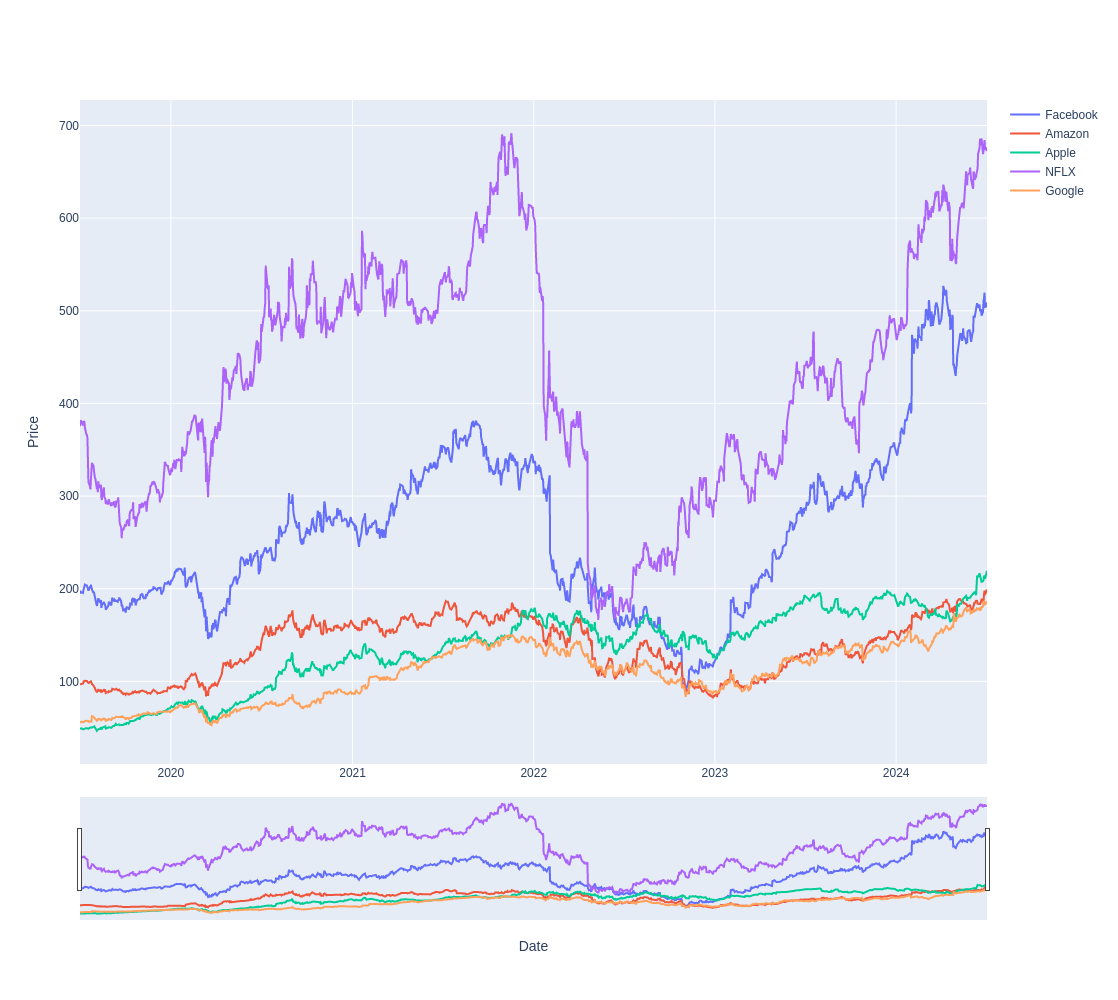

In [69]:
fig = go.Figure()
meta_df = pd.read_csv(PATH + "META" + ".csv", index_col='Date')
nflx_df = pd.read_csv(PATH + "NFLX" + ".csv", index_col='Date')
aapl_df = pd.read_csv(PATH + "AAPL" + ".csv", index_col='Date')
goog_df = pd.read_csv(PATH + "GOOG" + ".csv", index_col='Date')
amzn_df = pd.read_csv(PATH + "AMZN" + ".csv", index_col='Date')

meta_plot = go.Scatter(x=meta_df.index, y=meta_df['Close'], name="Facebook")
amzn_plot = go.Scatter(x=amzn_df.index, y=amzn_df['Close'], name="Amazon")
goog_plot = go.Scatter(x=goog_df.index, y=goog_df['Close'], name="Google")
aapl_plot = go.Scatter(x=aapl_df.index, y=aapl_df['Close'], name="Apple")
nflx_plot = go.Scatter(x=nflx_df.index, y=nflx_df['Close'], name="NFLX")

fig.add_trace(meta_plot)
fig.add_trace(amzn_plot)
fig.add_trace(aapl_plot)
fig.add_trace(nflx_plot)
fig.add_trace(goog_plot)

fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=1000, width=1000, showlegend=True)
fig.show()

### Daily Returns

For single stocks to find the daily returns we subtract opening price from the closing price. Then you could multiply by the number of shares owned. 

We calculate a percentage rate of return for each day to compare investments. Simple rate of return = (End Price - Beginning Price) / Beginning Price OR (EP/BP) - 1

In [70]:
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Close'] / df['Close'].shift(1)) - 1
    df.to_csv(PATH + ticker + '.csv')
    return df

In [71]:
add_daily_return_to_df(meta_df, "META")
add_daily_return_to_df(nflx_df, "NFLX")
add_daily_return_to_df(goog_df, "GOOG")
add_daily_return_to_df(amzn_df, "AMZN")
add_daily_return_to_df(aapl_df, "AAPL")

,Unnamed: 0,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,cum_return
Date,,,,,,,,,,
2019-07-02 00:00:00-04:00,0,48.595052,49.010044,48.582988,48.913532,67740800,0.0,0.0,NaN,NaN
2019-07-03 00:00:00-04:00,1,49.046237,49.326116,48.903886,49.318878,45448000,0.0,0.0,0.008287,1.008287
2019-07-05 00:00:00-04:00,2,49.063140,49.480544,48.954564,49.275459,69062000,0.0,0.0,-0.000880,1.007399
2019-07-08 00:00:00-04:00,3,48.450287,48.592638,47.871230,48.259682,101354400,0.0,0.0,-0.020614,0.986633
2019-07-09 00:00:00-04:00,4,48.061841,48.619184,47.967744,48.554043,82312000,0.0,0.0,0.006100,0.992651
...,...,...,...,...,...,...,...,...,...,...
2024-06-26 00:00:00-04:00,1254,211.500000,214.860001,210.639999,213.250000,66213200,0.0,0.0,0.019993,4.359734
2024-06-27 00:00:00-04:00,1255,214.690002,215.740005,212.350006,214.100006,49772700,0.0,0.0,0.003986,4.377112
2024-06-28 00:00:00-04:00,1256,215.770004,216.070007,210.300003,210.619995,82542700,0.0,0.0,-0.016254,4.305966


### Get Cumulative Return

In [72]:
def add_cum_return_to_df(df, ticker):
    df['cum_return'] = (1 + df['daily_return']).cumprod()
    df.to_csv(PATH + ticker + ".csv")
    return df

In [73]:
add_cum_return_to_df(meta_df, "META")
add_cum_return_to_df(amzn_df, "AMZN")
add_cum_return_to_df(nflx_df, "NFLX")
add_cum_return_to_df(aapl_df, "AAPL")
add_cum_return_to_df(goog_df, "GOOG")

,Unnamed: 0,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,cum_return
Date,,,,,,,,,,
2019-07-02 00:00:00-04:00,0,55.049355,55.525315,54.846088,55.499344,19832000,0.0,0.0,NaN,NaN
2019-07-03 00:00:00-04:00,1,55.806992,56.273963,55.629696,56.015255,15340000,0.0,0.0,0.009296,1.009296
2019-07-05 00:00:00-04:00,2,55.826471,56.579616,55.743565,56.515186,25286000,0.0,0.0,0.008925,1.018304
2019-07-08 00:00:00-04:00,3,56.194552,56.235006,55.497347,55.754055,24728000,0.0,0.0,-0.013468,1.004589
2019-07-09 00:00:00-04:00,4,55.526814,56.337141,55.295578,56.177574,26608000,0.0,0.0,0.007596,1.012221
...,...,...,...,...,...,...,...,...,...,...
2024-06-26 00:00:00-04:00,1254,184.199997,185.929993,183.990005,185.369995,13375700,0.0,0.0,-0.001132,3.340039
2024-06-27 00:00:00-04:00,1255,185.645004,187.500000,185.449997,186.860001,13025700,0.0,0.0,0.008038,3.366887
2024-06-28 00:00:00-04:00,1256,185.720001,186.580002,183.324997,183.419998,23032400,0.0,0.0,-0.018410,3.304904


### Merge Multiple Stocks in One Dataframe by Column Name

In [74]:
def merge_df_by_column_name(col_name, sdate, edate, *ticker):
    mult_df = pd.DataFrame()
    for x in tickers:
        df = pd.read_csv(PATH + x + ".csv", index_col='Date')
        if not df.index.is_unique:
            df = df.loc[~df.index.duplicated(), :]
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
    return mult_df

In [75]:
mult_df = merge_df_by_column_name('cum_return', S_DATE, E_DATE, ["AAPL", "NFLX", "GOOG", "META", "AMZN"])
mult_df

,META,AMZN,AAPL,GOOG,NFLX
Date,,,,,
2019-07-02 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN
2019-07-03 00:00:00-04:00,1.011282,1.002425,1.008287,1.009296,1.016754
2019-07-05 00:00:00-04:00,1.007179,1.004446,1.007399,1.018304,1.013638
2019-07-08 00:00:00-04:00,1.003897,1.009311,0.986633,1.004589,1.001944
2019-07-09 00:00:00-04:00,1.021590,1.027912,0.992651,1.012221,1.011986
...,...,...,...,...,...
2021-12-03 00:00:00-05:00,1.573538,1.752454,3.262724,2.565048,1.603841
2021-12-06 00:00:00-05:00,1.630103,1.771882,3.332882,2.588013,1.631969
2021-12-07 00:00:00-05:00,1.655436,1.821471,3.451020,2.664324,1.666303


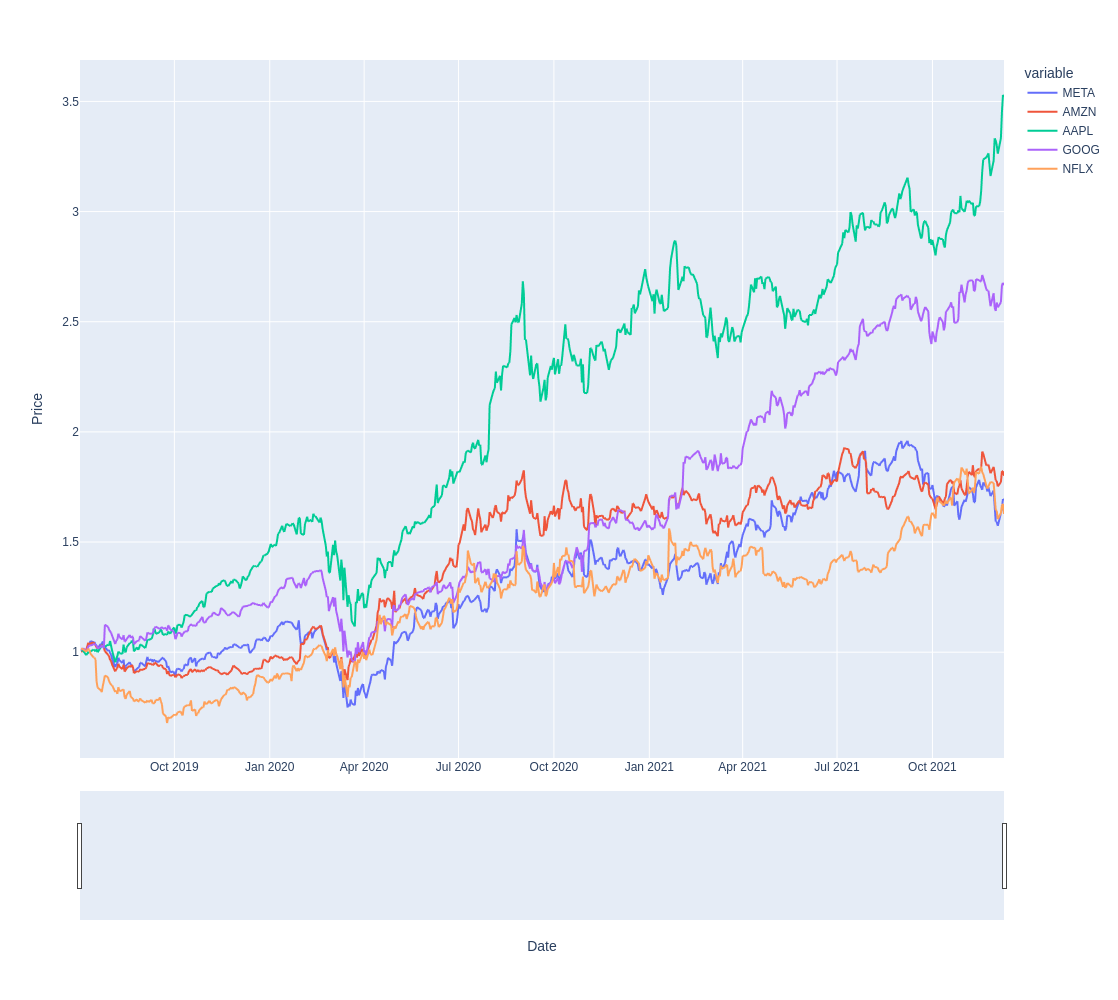

In [76]:
fig = px.line(mult_df, x =mult_df.index, y= mult_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=1000, width=1000, showlegend=True)
fig.show()

### Create a Price/Volume Chart

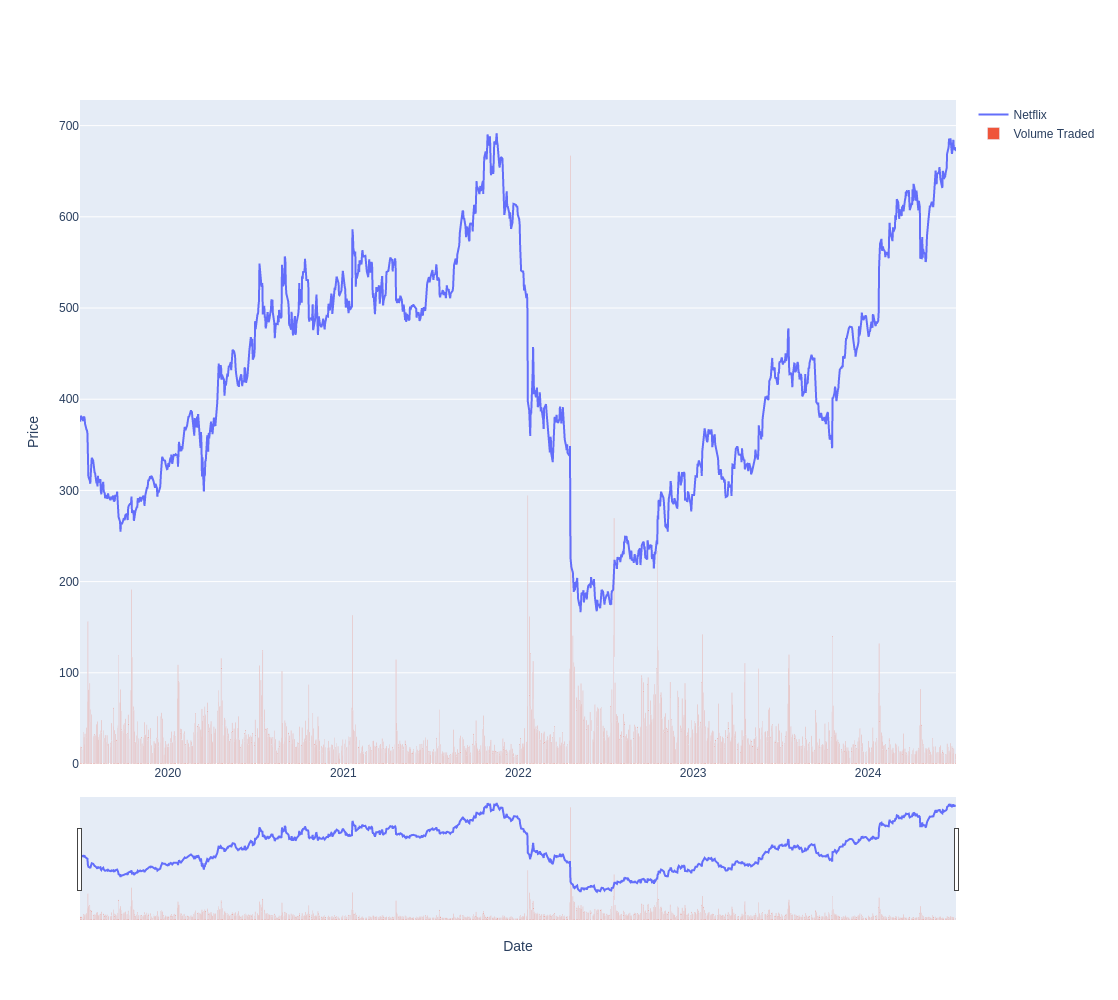

In [77]:
fig = go.Figure()
nflx_plot = go.Scatter(x=nflx_df.index, y=nflx_df['Close'], name="Netflix")
fig.add_trace(nflx_plot)
fig.add_trace(go.Bar(x=nflx_df.index, y=nflx_df['Volume']/200000, name="Volume Traded"))
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=1000, width=1000, showlegend=True)
fig.show()

In [68]:
nflx_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,cum_return
0,2019-07-02 00:00:00-04:00,374.890015,376.000000,370.309998,375.429993,3625000,0.0,0.0,NaN,NaN
1,2019-07-03 00:00:00-04:00,376.690002,381.989990,375.839996,381.720001,3799000,0.0,0.0,0.016754,1.016754
2,2019-07-05 00:00:00-04:00,378.290009,381.399994,375.559998,380.549988,3732200,0.0,0.0,-0.003065,1.013638
3,2019-07-08 00:00:00-04:00,378.190002,378.250000,375.359985,376.160004,3113400,0.0,0.0,-0.011536,1.001944
4,2019-07-09 00:00:00-04:00,379.059998,384.760010,377.500000,379.929993,6932800,0.0,0.0,0.010022,1.011986
...,...,...,...,...,...,...,...,...,...,...
1254,2024-06-26 00:00:00-04:00,672.409973,682.960022,670.020020,677.690002,3545800,0.0,0.0,0.007852,1.805104
1255,2024-06-27 00:00:00-04:00,679.349976,688.570007,678.140015,684.340027,2404800,0.0,0.0,0.009813,1.822817
1256,2024-06-28 00:00:00-04:00,679.000000,687.000000,673.080017,674.880005,3412400,0.0,0.0,-0.013824,1.797619
1257,2024-07-01 00:00:00-04:00,674.890015,675.020020,663.780029,673.609985,2210100,0.0,0.0,-0.001882,1.794236
